In [1]:
%matplotlib inline
import csv
from matplotlib import style
from matplotlib import pylab as plt
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import axes3d

style.use('ggplot')


In [2]:
df = pd.read_csv('/home/vivek/Documents/Data_Science/Data_Sets/Energy/Challenge 2/total_watt.csv', parse_dates=['Time'], names=['Time','Energy'], index_col='Time')
df.head(5)

,Energy
Time,
2011-04-18 13:22:00,925.840614
2011-04-18 13:52:00,483.295892
2011-04-18 14:22:00,915.761634
2011-04-18 14:52:00,609.043491
2011-04-18 15:22:00,745.155434


In [4]:
df['Energy']=df['Energy']*10**-3
df.head()

,Energy
Time,
2011-04-18 13:22:00,0.925841
2011-04-18 13:52:00,0.483296
2011-04-18 14:22:00,0.915762
2011-04-18 14:52:00,0.609043
2011-04-18 15:22:00,0.745155


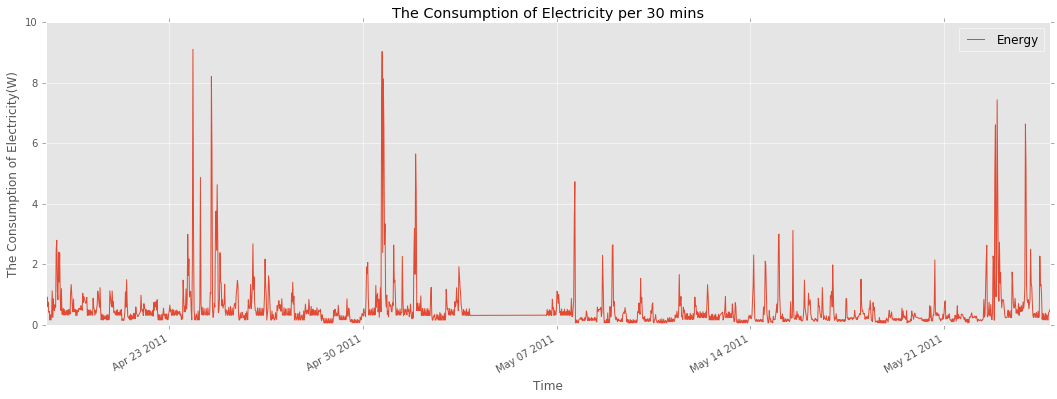

In [5]:
f = plt.figure(figsize=(18, 6))
df.plot(ax=f.gca())
plt.xlabel('Time')
plt.ylabel('The Consumption of Electricity(kW)')
plt.title('The Consumption of Electricity per 30 mins')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


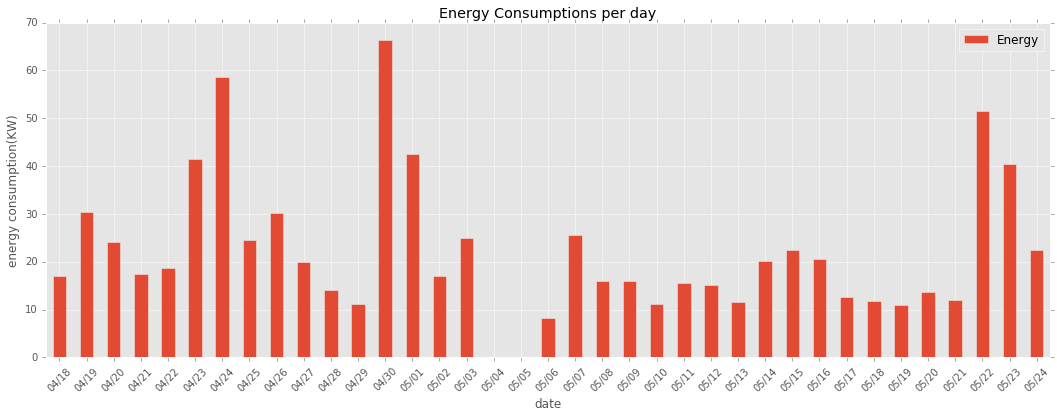

In [6]:
df = df.resample('1D', how='sum')
p = plt.figure(figsize=(18, 6))
df.plot(kind='bar', ax=p.gca())
date = pd.date_range('2011-04-18', '2011-05-24')
plt.xticks(np.arange(len(date)), [datetime.strftime(i, '%m/%d') for i in date], rotation=45)
plt.title('Energy Consumptions per day')
plt.xlabel('date')
plt.ylabel('energy consumption(kW)')

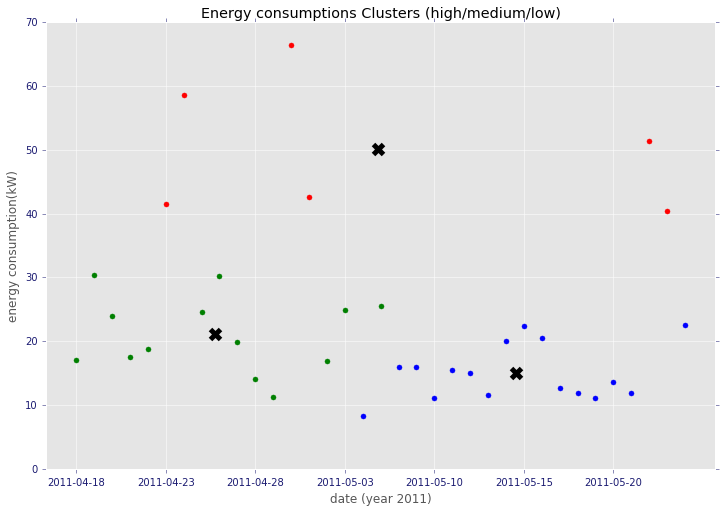

In [7]:
df = df.dropna()

date = df.index.tolist()
date = [x.strftime('%Y-%m-%d') for x in date]
encoder = LabelEncoder()
date_numeric = encoder.fit_transform(date)
consumption = df[df.columns[0]].values

X = np.array([date_numeric, consumption]).T

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_


fig, ax = plt.subplots(figsize=(12,8))

colors = ["b.","r.","g."]

for i in range(len(X)):
    ax.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

a = np.arange(0, len(X), 5)
ax.set_xticks(a)


plt.scatter(centroids[:,0],centroids[:, 1], marker = "x", s=100, c="black", linewidths = 5)

ax.set_xticklabels(encoder.inverse_transform(a.astype(int)))

ax.tick_params(axis='x', colors='midnightblue')
ax.tick_params(axis='y', colors='midnightblue')

ax.set_title('Energy consumptions Clusters (high/medium/low)')
ax.set_xlabel('date (year 2011)')
ax.set_ylabel('energy consumption(kW)')

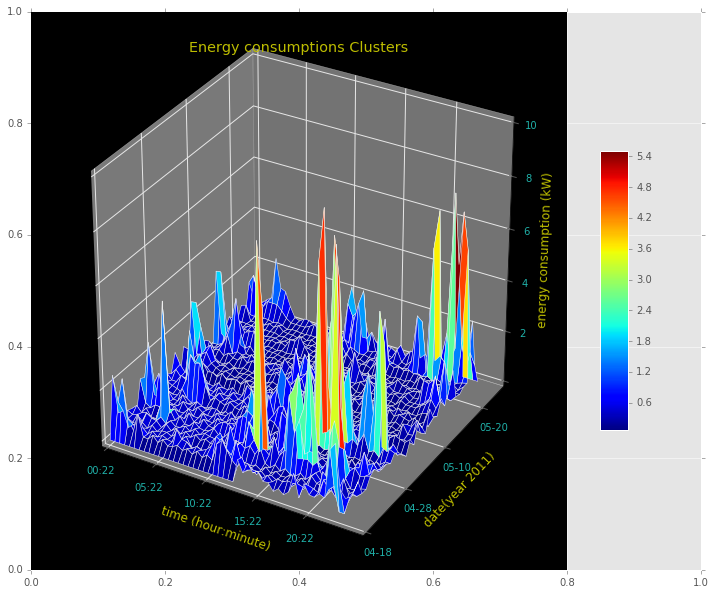

In [12]:
df = pd.read_csv('/home/vivek/Documents/Data_Science/Data_Sets/Energy/Challenge 2/total_watt.csv', parse_dates=[0], header=None, names=['datetime', 'consumption'])

df['date'] = [x.date() for x in df['datetime']] 
df['time'] = [x.time() for x in df['datetime']] 
df['consumption']=df['consumption']*10**-3

pv = df.pivot(index='time', columns='date', values='consumption')

# to avoid holes in the surface
pv = pv.fillna(0.0)

xx, yy = np.mgrid[0:len(pv),0:len(pv.columns)]

fig, ax = plt.subplots(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

surf=ax.plot_surface(xx, yy, pv.values, cmap='jet', cstride=1, rstride=1)
fig.colorbar(surf, shrink=0.5, aspect=10)

dates = [x.strftime('%m-%d') for x in pv.columns]
times = [x.strftime('%H:%M') for x in pv.index]



ax.set_title('Energy consumptions Clusters', color='y')
ax.set_xlabel('time (hour:minute)', color='y')
ax.set_ylabel('date(year 2011)', color='y')
ax.set_zlabel('energy consumption (kW)', color='y')

ax.set_xticks(xx[::10,0])
ax.set_xticklabels(times[::10], color='lightseagreen')
ax.set_yticks(yy[0,::10])
ax.set_yticklabels(dates[::10], color='lightseagreen')
ax.set_zticklabels(['','2','4','6','8','10'], color='lightseagreen')
ax.set_axis_bgcolor('black')

plt.show()